House Price Prediction

In [2]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading the dataset
data = pd.read_csv('housing.csv')

In [4]:
#displaying the data initially
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
#cheching for null values
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
#handeling the null values by dropping them
data.dropna(inplace = True)

In [7]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


(20433, 10)

In [8]:
#summary statistics of the data
data.describe() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
#correlation matrix with the heatmap
corr = data.corr(numeric_only = True)

<Axes: >

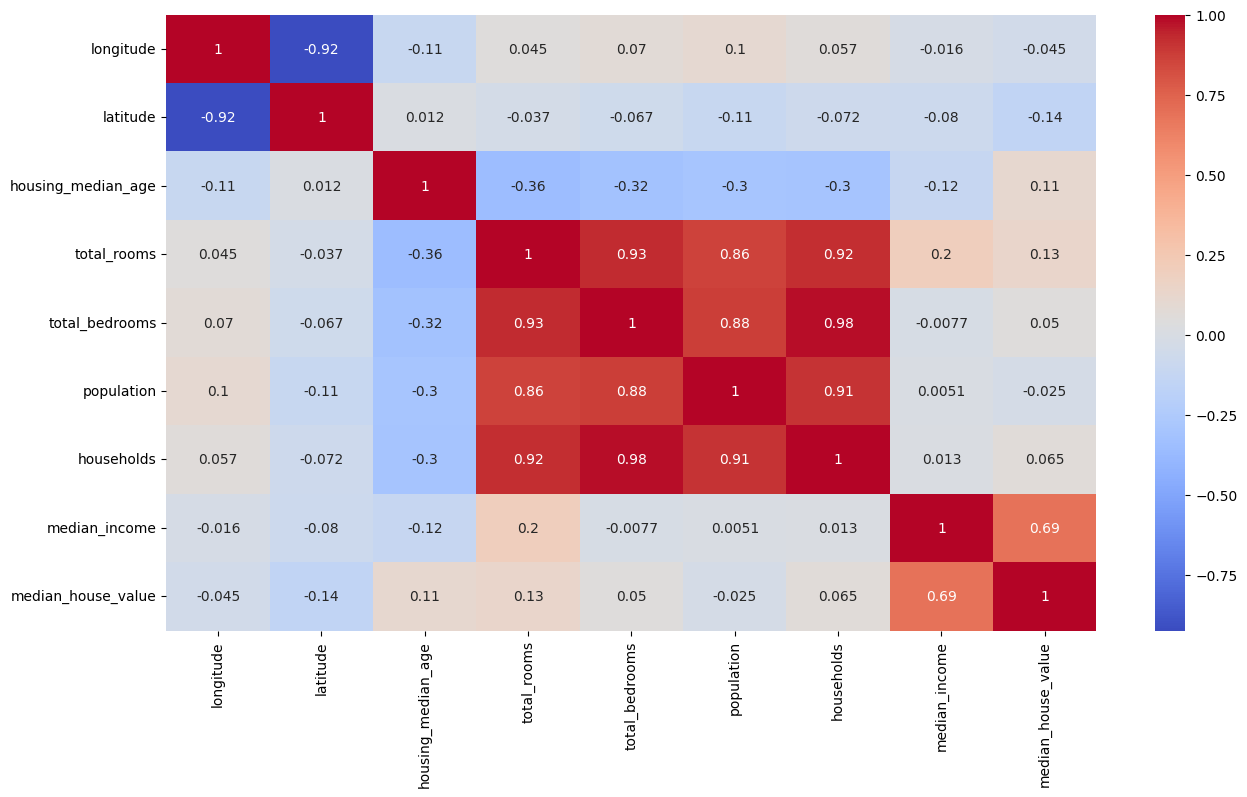

In [10]:
plt.figure(figsize = (15,8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

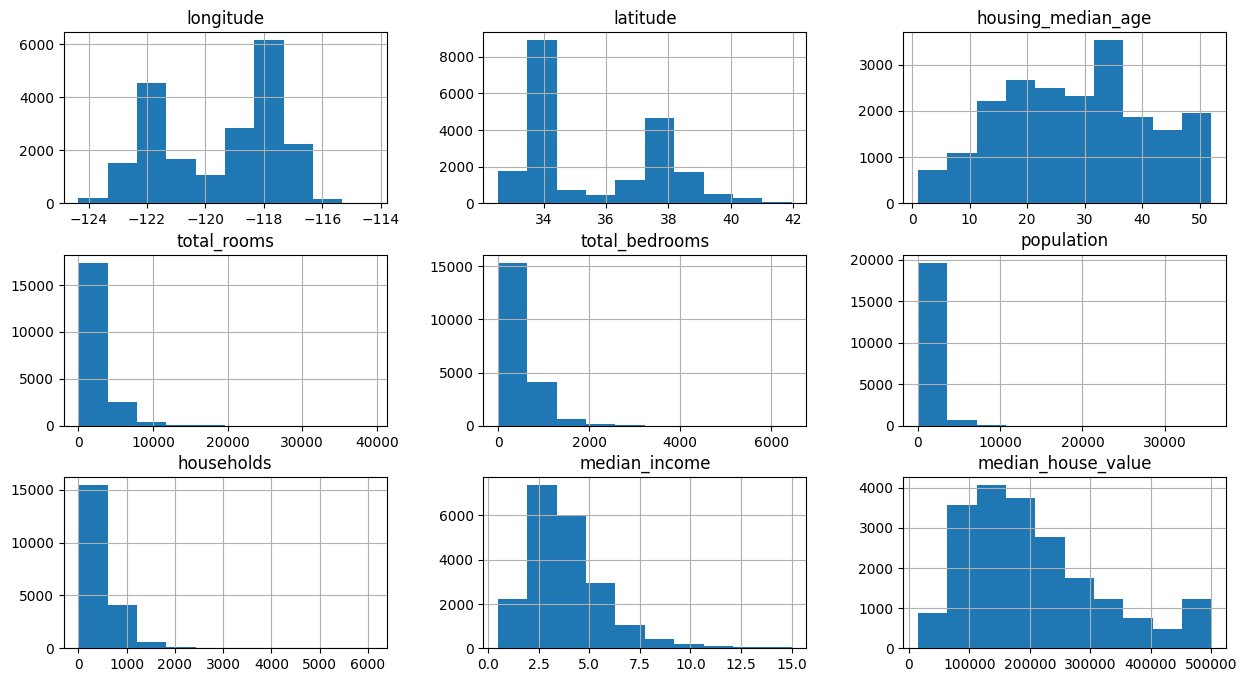

In [11]:
#histogram of all the numerical columns
data.hist(figsize = (15,8))

In [12]:
#applying log transformations to the skewed features
data['total_rooms'] = np.log1p(data['total_rooms'])
data['tottal_bedrooms'] = np.log1p(data['total_bedrooms'])
data['population'] = np.log1p(data['population'])
data['households'] = np.log1p(data['households'])

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'tottal_bedrooms'}>, <Axes: >, <Axes: >]],
      dtype=object)

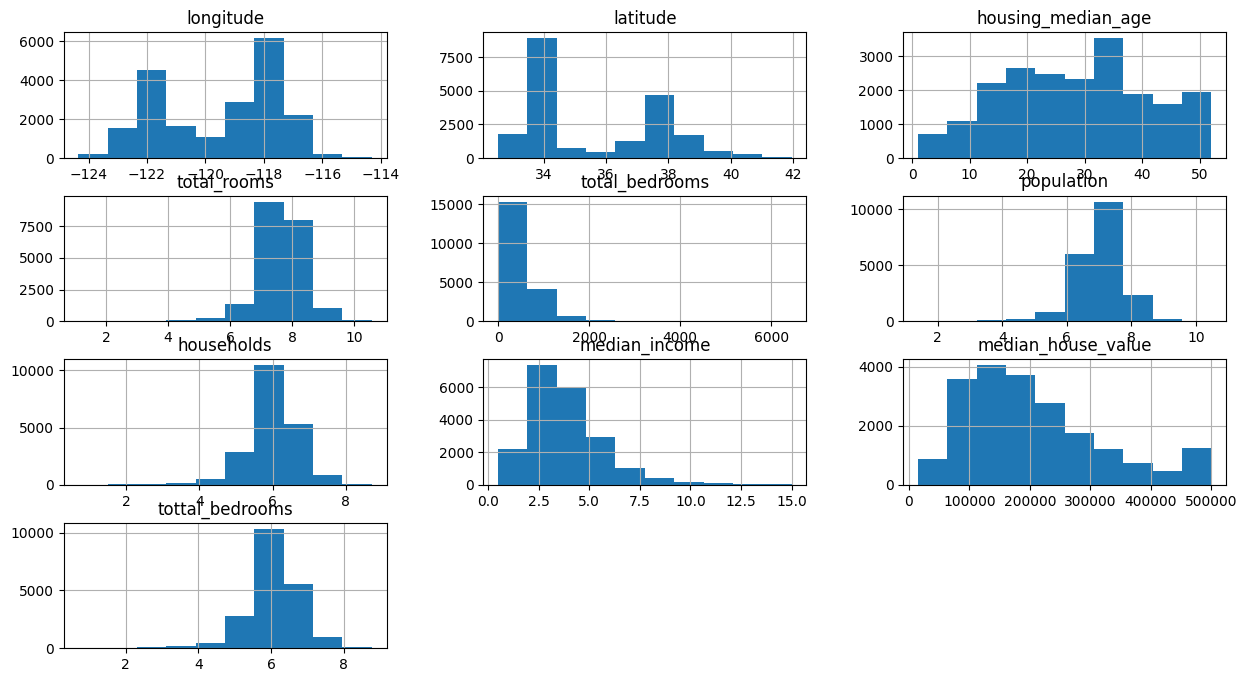

In [13]:
#histogram after log transformation
data.hist(figsize = (15,8))

In [14]:
data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [15]:
#one-hot encoding the categorical column 'ocean_proximity' using pandas and dropping the original categorial column
data = data.join(pd.get_dummies(data['ocean_proximity'], drop_first = True, dtype = int)).drop('ocean_proximity', axis = 1)

In [16]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,tottal_bedrooms,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.029967,0.069608,0.109259,0.055823,-0.015550,-0.045398,0.060817,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.032552,-0.066983,-0.136543,-0.088207,-0.079626,-0.144638,-0.068248,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.313918,-0.320451,-0.243011,-0.241630,-0.118278,0.106432,-0.272112,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.029967,-0.032552,-0.313918,1.000000,0.760280,0.864580,0.931700,0.205800,0.158506,0.945865,-0.012862,-0.007567,-0.016499,0.002862
total_bedrooms,0.069608,-0.066983,-0.320451,0.760280,1.000000,0.723306,0.787492,-0.007723,0.049686,0.812971,-0.006463,-0.004361,-0.019873,0.000679
population,0.109259,-0.136543,-0.243011,0.864580,0.723306,1.000000,0.932190,-0.004850,-0.021904,0.897523,-0.071775,-0.012866,-0.059377,-0.014457
households,0.055823,-0.088207,-0.241630,0.931700,0.787492,0.932190,1.000000,0.003918,0.072765,0.974593,-0.087137,-0.009222,-0.005827,0.019715
median_income,-0.015550,-0.079626,-0.118278,0.205800,-0.007723,-0.004850,0.003918,1.000000,0.688355,-0.025575,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.158506,0.049686,-0.021904,0.072765,0.688355,1.000000,0.053311,-0.484787,0.023525,0.160526,0.140378
tottal_bedrooms,0.060817,-0.068248,-0.272112,0.945865,0.812971,0.897523,0.974593,-0.025575,0.053311,1.000000,-0.044914,-0.001902,-0.016793,0.016429


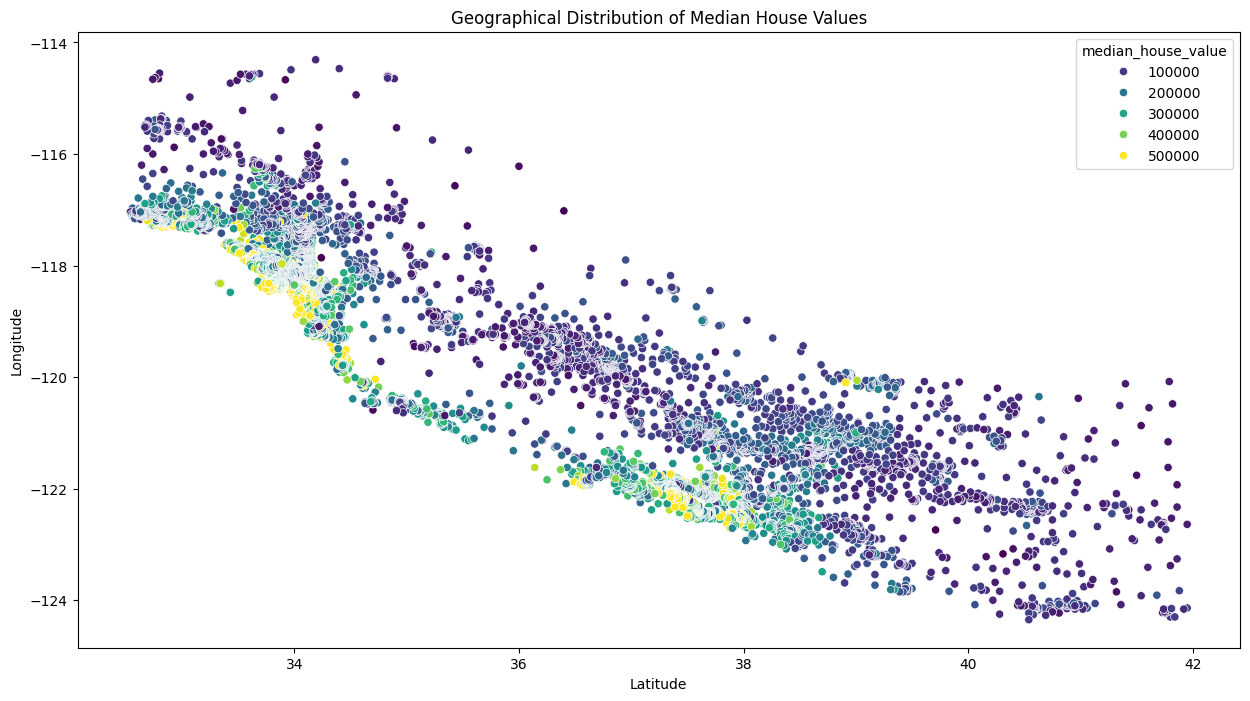

In [17]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = 'latitude', y = 'longitude', hue = 'median_house_value', data = data, palette = 'viridis')
plt.title('Geographical Distribution of Median House Values')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [ ]:
#feature engineering - created two new features from the existing ones
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']
data['household_rooms'] = data['total_rooms'] / data['households']

<Axes: >

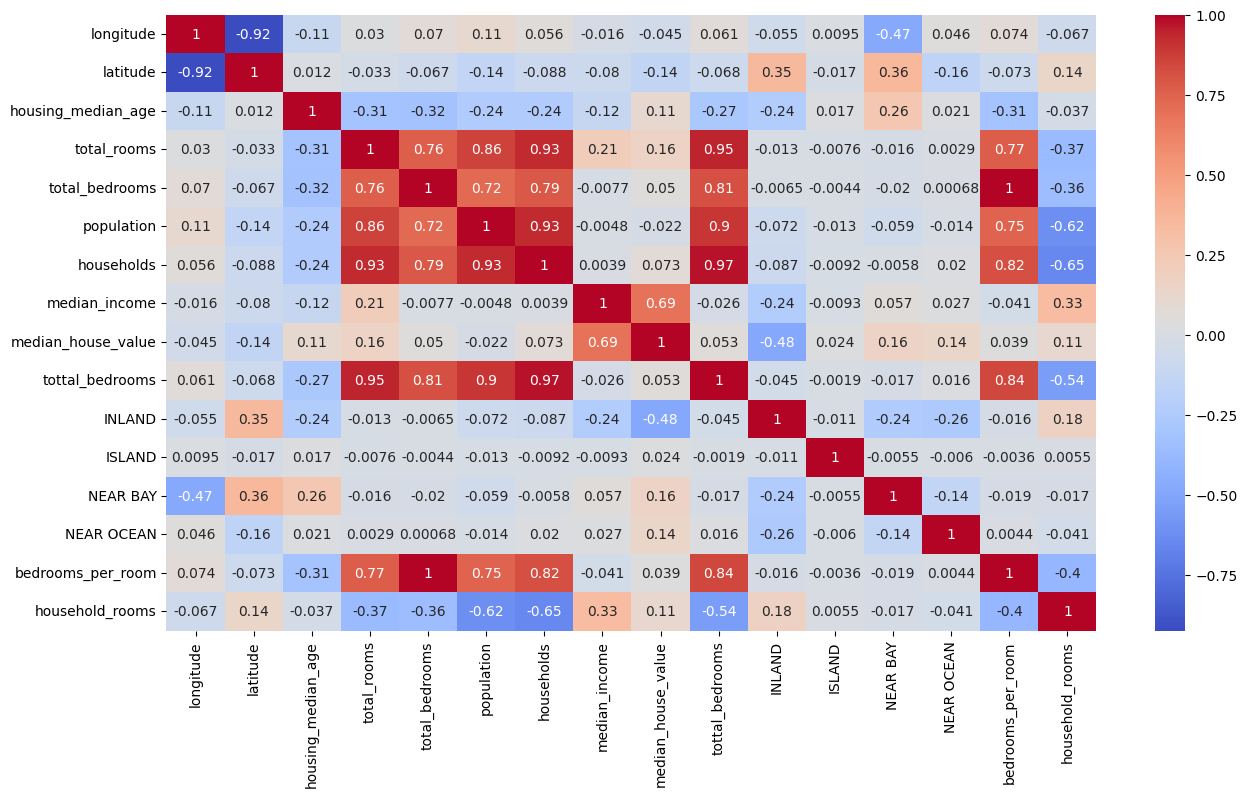

In [20]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')